# Logistic Regression for Binary Classification on Handwritten Digits

Using MNIST dataset to perform logistic regression for binary classification using MNIST dataset

In [1]:
import numpy as np
import pandas as pd 
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt

### 1. Importing the data

In [2]:
hdigits = fetch_openml('mnist_784', version = 1, cache=True)

In [3]:
hdigits["data"]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [4]:
hdigits["target"]

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

Filtering to retrieve images that have labels '5' or '6'

In [5]:
#filtering
filter_ind = np.where((hdigits["target"]=="5")|(hdigits["target"]=="6"))
filter_ind

(array([    0,    11,    13, ..., 69989, 69998, 69999]),)

In [6]:
hdigits_X = np.array(hdigits["data"])[filter_ind]
hdigits_Y = np.array(hdigits["target"])[filter_ind]

In [7]:
hdigits_Y

array(['5', '5', '6', ..., '6', '5', '6'], dtype=object)

In [8]:
hdigits_X.shape, hdigits_Y.shape #verifying the shapes

((13189, 784), (13189,))

### 2. Splitting the data

80% of the data will be used for training and the rest of the data will be used for testing.

In [9]:
from sklearn.model_selection import train_test_split

In [9]:
#converting to integers
hdigits_Y = hdigits_Y.astype(int)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(hdigits_X, hdigits_Y, test_size = 0.2)

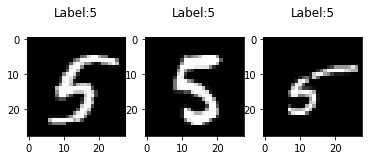

In [11]:
#visualize 
plt.figure()
for index,(image,label) in enumerate(zip(X_train[0:3], y_train[0:3])):
    plt.subplot(1,3,index+1)
    plt.imshow(np.reshape(image,(28,28)),cmap = plt.cm.gray)
    plt.title('Label:%i\n'%int(label))

### 3. Cross Validation for Tuning Hyperparameter Value (Squared Error)

Run logistic regression on the training data with $\ell_2$ norm, and use cross-validation and validation curve in order to choose the scale hyperparameter. Validation error serves as a proxy for test error under modeling assumption. Utilizing validation curve helps in locating the "sweet spot" of the bias-variance tradeoff 

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
#5-fold CV
LRCV = LogisticRegressionCV(cv=5,solver='liblinear').fit(X_train,y_train)

In [13]:
LRCV.Cs_ #list of inverse of regularization parameter values used for cross-validation

array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04])

In [14]:
LRCV.scores_[6] #shows the score for each fold

array([[0.97678825, 0.97157745, 0.96920891, 0.96684036, 0.96684036,
        0.96684036, 0.96778778, 0.96731407, 0.96636665, 0.96684036],
       [0.97345972, 0.97156398, 0.97203791, 0.97109005, 0.97109005,
        0.97061611, 0.97109005, 0.97156398, 0.97156398, 0.97109005],
       [0.97677725, 0.97393365, 0.97156398, 0.97061611, 0.97251185,
        0.97109005, 0.97061611, 0.97156398, 0.97109005, 0.97014218],
       [0.98009479, 0.97203791, 0.97014218, 0.96919431, 0.96919431,
        0.96919431, 0.96872038, 0.97061611, 0.97014218, 0.96824645],
       [0.97298578, 0.97251185, 0.97109005, 0.96966825, 0.96919431,
        0.96919431, 0.96824645, 0.96824645, 0.96919431, 0.96824645]])

In [15]:
LRCV.scores_[6].mean(axis = 0)

array([0.97602116, 0.97232497, 0.97080861, 0.96948182, 0.96976618,
       0.96938703, 0.96929215, 0.96986092, 0.96967143, 0.9689131 ])

In [175]:
LRCV.C_ #best value

array([0.0001])

Using the default parameters above, we plot the validation curve and training curve to see the behavior of the curves. Gives an idea of which "range" of hyperparameter would be a good fit. The best value of hyperparameter that mapped to the best score was C = 0.0001

In [16]:
from sklearn.model_selection import validation_curve
train_scores, validation_scores= validation_curve(LogisticRegression(solver='liblinear'), X_train, y_train, 
                                             param_name = "C", param_range = LRCV.Cs_,scoring = "accuracy")

In [17]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)
validation_scores_std = np.std(validation_scores, axis=1)

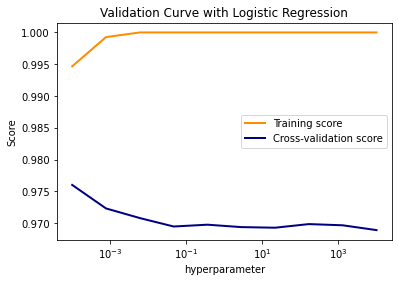

In [18]:
plt.title("Validation Curve with Logistic Regression")
plt.xlabel("hyperparameter")
plt.ylabel("Score")
plt.semilogx(
    LRCV.Cs_, train_scores_mean, label="Training score", color="darkorange", lw=2
)
plt.semilogx(
    LRCV.Cs_, validation_scores_mean, label="Cross-validation score", color="navy", lw=2
)
plt.legend(loc="best")
plt.show()

With the best value from the tested values in mind, experiment with three different sets each containing six different values. The focus is to look for the "peak" of both training score and cross-validation score.

#### Set 1

In [19]:
param_choice = [7e-4,1e-4,5e-5,1e-5,6e-6,1e-6]
train_scores, validation_scores= validation_curve(LogisticRegression(solver='liblinear'), X_train, y_train,
                                                  param_name = "C", param_range = param_choice, scoring = "accuracy")

In [20]:
train_scores_mean = np.mean(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)

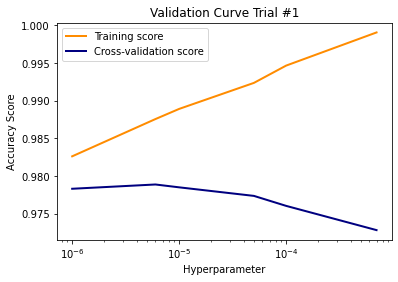

In [176]:
plt.title("Validation Curve Trial #1")
plt.xlabel("Hyperparameter")
plt.ylabel("Accuracy Score")
plt.semilogx(param_choice, train_scores_mean, label="Training score", color="darkorange", lw=2)
plt.semilogx(param_choice, validation_scores_mean, label="Cross-validation score", color="navy", lw=2)
plt.legend(loc="best")
plt.savefig('trial_1.png',dpi=150)
plt.show()

$\Rightarrow$ the accuracy reaches one and then decreases as hyperparameter becomes smaller. On the other hand, the accuaracy for cross-validation increases as hyperparameter gets smaller but decreases agin after 5e-5. Suggesting that might be the lowest point of our cross validation curve when plotted against error

#### Set 2

In [22]:
param_choice2 = [8e-3,1e-4,1e-5,5e-8, 5e-9,5e-10]

train_scores2, validation_scores2= validation_curve(LogisticRegression(solver='liblinear'), X_train, y_train, 
                                             param_name = "C", param_range = param_choice2,scoring = "accuracy")

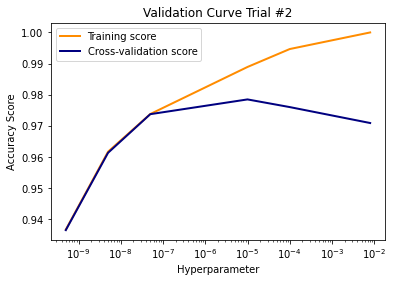

In [177]:
train_scores_mean2 = np.mean(train_scores2, axis=1)
validation_scores_mean2 = np.mean(validation_scores2, axis=1)

plt.title("Validation Curve Trial #2")
plt.xlabel("Hyperparameter")
plt.ylabel("Accuracy Score")
plt.semilogx(param_choice2, train_scores_mean2, label="Training score", color="darkorange", lw=2)
plt.semilogx(param_choice2, validation_scores_mean2, label="Cross-validation score", color="navy", lw=2)
plt.legend(loc="best")
plt.savefig('trial_2.png',dpi=150)
plt.show()

**Note**: Cross-validation curve peaks at $C=1\times10^{-5}$ before declinin while training score continues to increase beyond this point. This is an indication of overfitting to noise in the training data.

#### Set 3

In [78]:
param_choice3 = [5e-4,1e-4,8e-5,5e-5,3e-5,1e-5]

train_scores3, validation_scores3= validation_curve(LogisticRegression(solver='liblinear'), X_train, y_train, 
                                             param_name = "C", param_range = param_choice3,scoring = "accuracy")

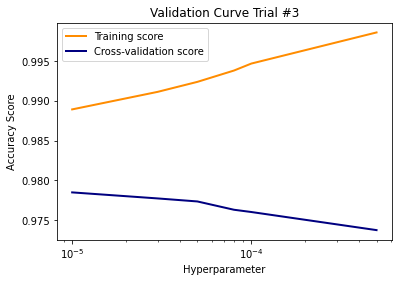

In [178]:
train_scores_mean3 = np.mean(train_scores3, axis=1)
validation_scores_mean3 = np.mean(validation_scores3, axis=1)

plt.title("Validation Curve Trial #3")
plt.xlabel("Hyperparameter")
plt.ylabel("Accuracy Score")
plt.semilogx(param_choice3, train_scores_mean3, label="Training score", color="darkorange", lw=2)
plt.semilogx(param_choice3, validation_scores_mean3, label="Cross-validation score", color="navy", lw=2)
plt.legend(loc="best")
plt.savefig('trial_4.png',dpi=150)
plt.show()

In [80]:
train_scores_mean3, validation_scores_mean3

(array([0.99857833, 0.99466873, 0.99379205, 0.99237038, 0.99111459,
        0.98891099]),
 array([0.97374659, 0.97602116, 0.97630556, 0.97734817, 0.97772727,
        0.97848561]))

$\Rightarrow$ Conclusion of $\lambda$ = $1\times10^{-5}$ as the best hyperparameter

### 4. Cross Validation for Tuning Hyperparameter Value (Absolute)

Same analysis as above except this section will be utilizing $\ell_1$ norm

In [93]:
LR_l1 = LogisticRegressionCV(Cs = [1e-4,1e-3,1e-2,1e-1,1.0],penalty = 'l1',solver='liblinear',max_iter=5000)

In [94]:
LR_l1.fit(X_train,y_train)

LogisticRegressionCV(Cs=[0.0001, 0.001, 0.01, 0.1, 1.0], max_iter=5000,
                     penalty='l1', solver='liblinear')

In [95]:
LR_l1.scores_

{6: array([[0.95973472, 0.97252487, 0.97536712, 0.96826149, 0.9687352 ],
        [0.96777251, 0.98246445, 0.97677725, 0.96919431, 0.97156398],
        [0.96445498, 0.97725118, 0.97914692, 0.97345972, 0.97393365],
        [0.96161137, 0.97867299, 0.97725118, 0.97203791, 0.97440758],
        [0.96777251, 0.97582938, 0.97251185, 0.96966825, 0.96872038]])}

In [96]:
LR_l1.C_

array([0.001])

In [97]:
l1_train_score, l1_valscore = validation_curve(LogisticRegression(penalty = 'l1',solver = "liblinear",max_iter=5000), 
                                               X_train,y_train, param_name = "C", 
                                               param_range = [1e-6,1e-4,1e-3,1e-2,1e-1,1.0],scoring = "accuracy")

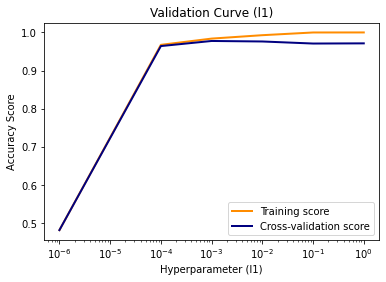

In [180]:
l1_train_score_m = np.mean(l1_train_score, axis=1)
l1_val_scores_m = np.mean(l1_valscore, axis=1)

plt.title("Validation Curve (l1)")
plt.xlabel("Hyperparameter (l1)")
plt.ylabel("Accuracy Score")
plt.semilogx([1e-6,1e-4,1e-3,1e-2,1e-1,1.0], l1_train_score_m, label="Training score", color="darkorange", lw=2)
plt.semilogx([1e-6,1e-4,1e-3,1e-2,1e-1,1.0], l1_val_scores_m, label="Cross-validation score", color="navy", lw=2)
plt.legend(loc="best")
plt.savefig('lasso1.png',dpi=150)
plt.show()

The cross-validation curve seems to have a peak in accuracy with $10^{-3}$ according to the two Lasso regression outputs. To dive into this, do a verification round where the hyperparameters are around $10^{-3}$

In [104]:
l1_train_score2, l1_val_scores2 = validation_curve(LogisticRegression(penalty = 'l1',solver = "liblinear",max_iter=5000), X_train, 
                                                  y_train, param_name = "C", param_range = [1e-4,1e-3,3e-3,5e-3,8e-3,1e-2],scoring = "accuracy")

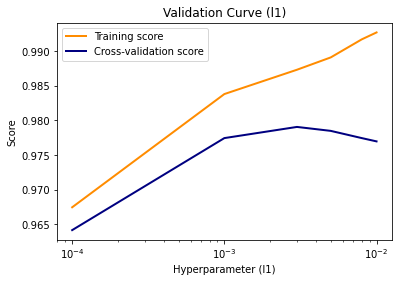

In [182]:
l1_train_score_m2 = np.mean(l1_train_score2, axis=1)
l1_val_scores_m2 = np.mean(l1_val_scores2, axis=1)

plt.title("Validation Curve (l1)")
plt.xlabel("Hyperparameter (l1)")
plt.ylabel("Score")
plt.semilogx([1e-4,1e-3,3e-3,5e-3,8e-3,1e-2], l1_train_score_m2, label="Training score", color="darkorange", lw=2)
plt.semilogx([1e-4,1e-3,3e-3,5e-3,8e-3,1e-2], l1_val_scores_m2, label="Cross-validation score", color="navy", lw=2)
plt.legend(loc="best")
plt.savefig('lasso2.png',dpi=150)
plt.show()

In [106]:
l1_train_score_m2,l1_val_scores_m2

(array([0.96746755, 0.98379302, 0.98729978, 0.98907686, 0.99168325,
        0.99267842]),
 array([0.96417439, 0.97744332, 0.97905447, 0.97848566, 0.977443  ,
        0.97696911]))

In [107]:
l1_verify = LogisticRegressionCV(Cs = [1e-4,1e-3,3e-3,5e-3,8e-3,1e-2],penalty = 'l1',solver='liblinear',max_iter=5000)
l1_verify.fit(X_train,y_train)

LogisticRegressionCV(Cs=[0.0001, 0.001, 0.003, 0.005, 0.008, 0.01],
                     max_iter=5000, penalty='l1', solver='liblinear')

In [108]:
l1_verify.C_

array([0.003])

$\Rightarrow$ We verify from the graph and also running the last LogisticRegressionCV to confirm that the hyperparameter that minimizes that cross-validation score indeed is around $10^{-1}$. In fact, $3\times10^{-3}$ seems to have the best average accuracy. 

### 5. Regularization Comparison

Using "best" hyperparameter $C_{\ell2}=1\times10^{-5}$ for $\ell_2$ regularization and $C_{\ell1}=3\times10^{-3}$ for $\ell_1$ regularization, we compare the two regularization method by using test data set. 

In [91]:
## best l2 regularization model
l2_choice = LogisticRegression(C = 1e-5,solver = 'liblinear')
l2_choice.fit(X_train,y_train)
l1_choice = LogisticRegression(C=3e-3, solver = 'liblinear')
l1_choice.fit(X_train,y_train)

LogisticRegression(C=0.003, solver='liblinear')

In [152]:
#test data
#l2
predictions_l2 = l2_choice.predict(X_test)
l2_accuracy = l2_choice.score(X_test,y_test)

#1
predictions_l1 = l1_choice.predict(X_test)
l1_accuracy = l1_choice.score(X_test,y_test)

In [153]:
l2_accuracy

0.9829416224412434

In [154]:
l1_accuracy

0.9761182714177407

Two outputs above tells us that the $l2$ regularization is better than $l1$ regularization. To further analyze before coming to a conclusion, we dive deeper into analyzing the output

In [155]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions_l2))

              precision    recall  f1-score   support

           5       0.99      0.98      0.98      1232
           6       0.98      0.99      0.98      1406

    accuracy                           0.98      2638
   macro avg       0.98      0.98      0.98      2638
weighted avg       0.98      0.98      0.98      2638



In [156]:
print(classification_report(y_test,predictions_l1))

              precision    recall  f1-score   support

           5       0.97      0.97      0.97      1232
           6       0.98      0.98      0.98      1406

    accuracy                           0.98      2638
   macro avg       0.98      0.98      0.98      2638
weighted avg       0.98      0.98      0.98      2638



In [162]:
from sklearn import metrics

cm1 = metrics.confusion_matrix(y_test,predictions_l1)
cm1

array([[1201,   31],
       [  32, 1374]])

In [163]:
cm2 = metrics.confusion_matrix(y_test,predictions_l2)
cm2

array([[1204,   28],
       [  17, 1389]])

In [157]:
y_df = pd.DataFrame(data = {"l2_predictions":predictions_l2,"l1_predictions":predictions_l1, "y": y_test})

In [158]:
np.count_nonzero(y_df["l2_predictions"]!=y_df["y"])

45

In [159]:
np.count_nonzero(y_df["l1_predictions"]!=y_df["y"])

63

$\Rightarrow$ **Conclusion**: The classification reports show that precision was same for number 6 for both regularization, but $\ell_2$ regularization had a higher precision of 0.99 than $\ell_1$ regularization precision of 0.98 for classifying number 5. USing the confusion matrix, we see that the number of misclassified 5's were substantially smaller for $\ell_2$ than $\ell_1$. Because $\ell_2$ regularization had smaller value of overall misclassification (=45) and a higher accuracy score, we conclude that $\ell_2$ regularization would be a better choice. 

### 6. Visualize misclassified images

In [165]:
index = 0
misclassified = []
for index, (label,predict) in enumerate(zip(y_test,predictions_l2)):
    if label!=predict:
        misclassified.append(index)
        index = index+1

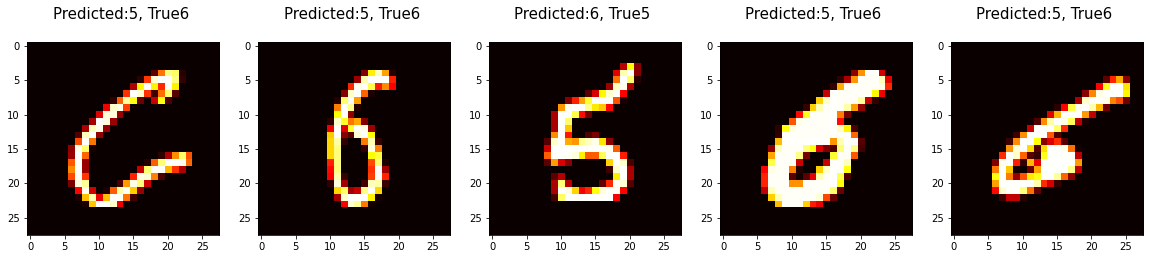

In [174]:
plt.figure(figsize=(20,4))

for plotindex,badindex in enumerate(misclassified[0:5]):
    plt.subplot(1,5,plotindex+1)
    plt.imshow(np.reshape(X_test[badindex],(28,28)),cmap=plt.cm.hot)
    plt.title("Predicted:{}, True{} \n".format(predictions_l2[badindex], y_test[badindex]),fontsize=15)